In [202]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, WeekdayLocator
from matplotlib import rc
import seaborn as sns
import numpy as np
import numpy as np

# Window
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# Mac
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [218]:
user = pd.read_csv('./data/user_infos_10000.csv')

In [12]:
df = pd.read_csv('./data/creature/user_creature_data.csv').drop_duplicates()

In [22]:
df['itemName'].nunique()

743

In [23]:
df['clone_itemName'].nunique()

806

In [24]:
df.head()

,serverId,characterId,itemId,itemName,itemRarity,clone_itemId,clone_itemName
0,cain,a34c97caacae37291773576630580bae,b2358abfe3ea375267720b1a9d3dd598,SD 흰 구름 전령 에를리히,레어,b136081859ebc6ac6153208e1a41f77f,파핑파핑 8비트 슈므
1,prey,616aa1d76e668caaf3a1f0902bd8d0f5,a84f38fe2e4debcbe677a3693bdd545b,순백의 옵타티오,레어,NaN,NaN
2,prey,63250149620e5a7206f4b60b34bd8cac,b2358abfe3ea375267720b1a9d3dd598,SD 흰 구름 전령 에를리히,레어,NaN,NaN
3,cain,87db31f36838a321388a01ead73213fd,26bfffdcf22964bf2f3c5c2ade313236,SD 땅지기 슈므,레어,cefc6a7af4bb9eead3f93dce5275bd1d,SD 태초의 세리아
4,siroco,d54ff98a3695b385eec540bdda8dc611,26bfffdcf22964bf2f3c5c2ade313236,SD 땅지기 슈므,레어,NaN,NaN


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568113 entries, 0 to 614384
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   serverId        568113 non-null  object
 1   characterId     568113 non-null  object
 2   itemId          568113 non-null  object
 3   itemName        568113 non-null  object
 4   itemRarity      568113 non-null  object
 5   clone_itemId    113292 non-null  object
 6   clone_itemName  113292 non-null  object
dtypes: object(7)
memory usage: 34.7+ MB


In [25]:
df.columns

Index(['serverId', 'characterId', 'itemId', 'itemName', 'itemRarity',
       'clone_itemId', 'clone_itemName'],
      dtype='object')

In [26]:
equ_creature = df[['serverId', 'characterId', 'itemId', 'itemName']]

In [27]:
clone_creature = df[['serverId', 'characterId', 'clone_itemId', 'clone_itemName']]

In [28]:
equ_creature['itemName'].value_counts()

순백의 나비 공주                     138243
SD 흰 구름 전령 에를리히               127895
축제의 여왕 페리아                     55081
WON'S 다정한 SD 세리아 Ver.2         31910
다정한 SD 세리아 Ver.2               25477
                               ...  
왕립 아라드 고교 SD 남귀검사[25~30Lv]         1
SD 악귀나찰[평범한]                       1
왕립 아라드 고교 SD 여격투가[25~30Lv]         1
코코[딜러형]                            1
왕립 아라드 고교 SD 총검사[20~25Lv]          1
Name: itemName, Length: 743, dtype: int64

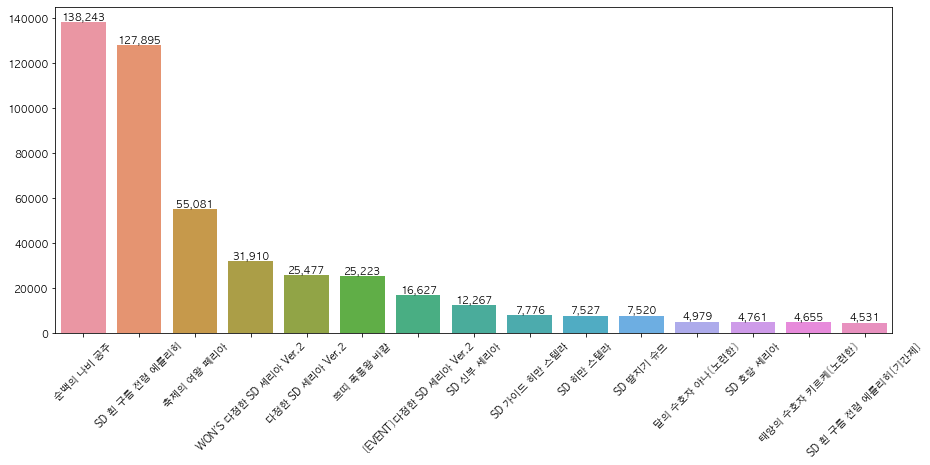

In [211]:
cnt_df = pd.DataFrame(equ_creature['itemName'].value_counts()).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(15,6))
x_label = cnt_df[:15]['itemName']
y_label = cnt_df[:15]['cnt']
sns.barplot(x = x_label, y = y_label)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('')

plt.show()

In [209]:
cnt_df['ratio'] = round(cnt_df['cnt']/cnt_df['cnt'].sum(),3)
print(f'총 캐릭터 수 : {len(df):,}')
print(f"크리처 보유 캐리 수 : {len(df[~df['itemName'].isna()]):,}")
print(f'크리처 종류 : {len(cnt_df):,}')
print(f"상위 15개 항목 : {cnt_df[:15]['cnt'].sum():,} ({cnt_df[:15]['ratio'].sum()})")
cnt_df[:15]

총 캐릭터 수 : 568,113
크리처 보유 캐리 수 : 568,113
크리처 종류 : 743
상위 15개 항목 : 474,472 (0.8340000000000001)


,itemName,cnt,ratio
0,순백의 나비 공주,138243,0.243
1,SD 흰 구름 전령 에를리히,127895,0.225
2,축제의 여왕 페리아,55081,0.097
3,WON'S 다정한 SD 세리아 Ver.2,31910,0.056
4,다정한 SD 세리아 Ver.2,25477,0.045
5,쁘띠 폭룡왕 바칼,25223,0.044
6,[EVENT]다정한 SD 세리아 Ver.2,16627,0.029
7,SD 신부 세리아,12267,0.022
8,SD 가이드 히만 스텔라,7776,0.014
9,SD 히만 스텔라,7527,0.013


In [4]:
# 상위 유저 데이터
user_infos = pd.read_csv('./data/user_infos_10000.csv')

# 유저 크리쳐 데이터
creature_info = pd.read_csv('./data/creature/active_creature_infos.csv')

In [88]:
user_infos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618418 entries, 0 to 618417
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   basejob        618418 non-null  object
 1   subjob         618418 non-null  object
 2   server         618418 non-null  object
 3   char_name      618414 non-null  object
 4   char_fame      618418 non-null  int64 
 5   character_ids  618418 non-null  object
dtypes: int64(1), object(5)
memory usage: 28.3+ MB


In [ ]:
# 상위 10,000
rankers_ids = user_infos.sort_values('char_fame', ascending=False)[:10000]['character_ids'].values

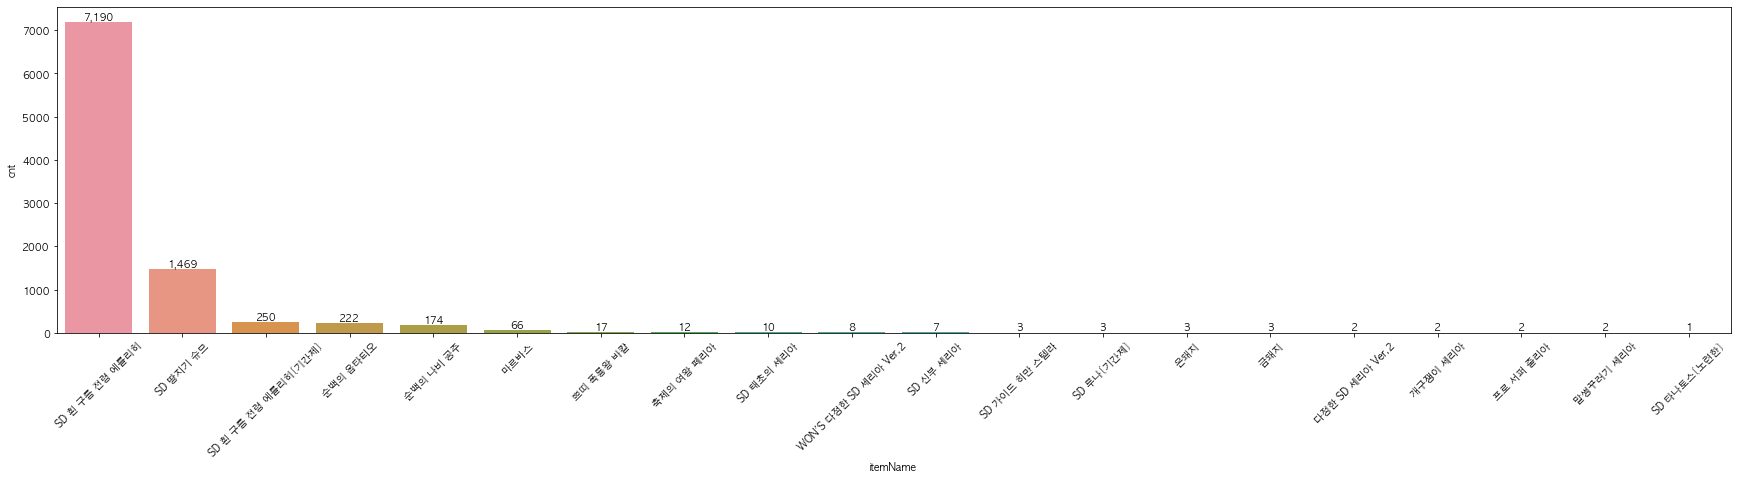

In [92]:
cnt_df = pd.DataFrame(df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:20]).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(30,6))
x_label = cnt_df[:20]['itemName']
y_label = cnt_df[:20]['cnt']
sns.barplot(x = x_label, y = y_label)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')
    
plt.show()

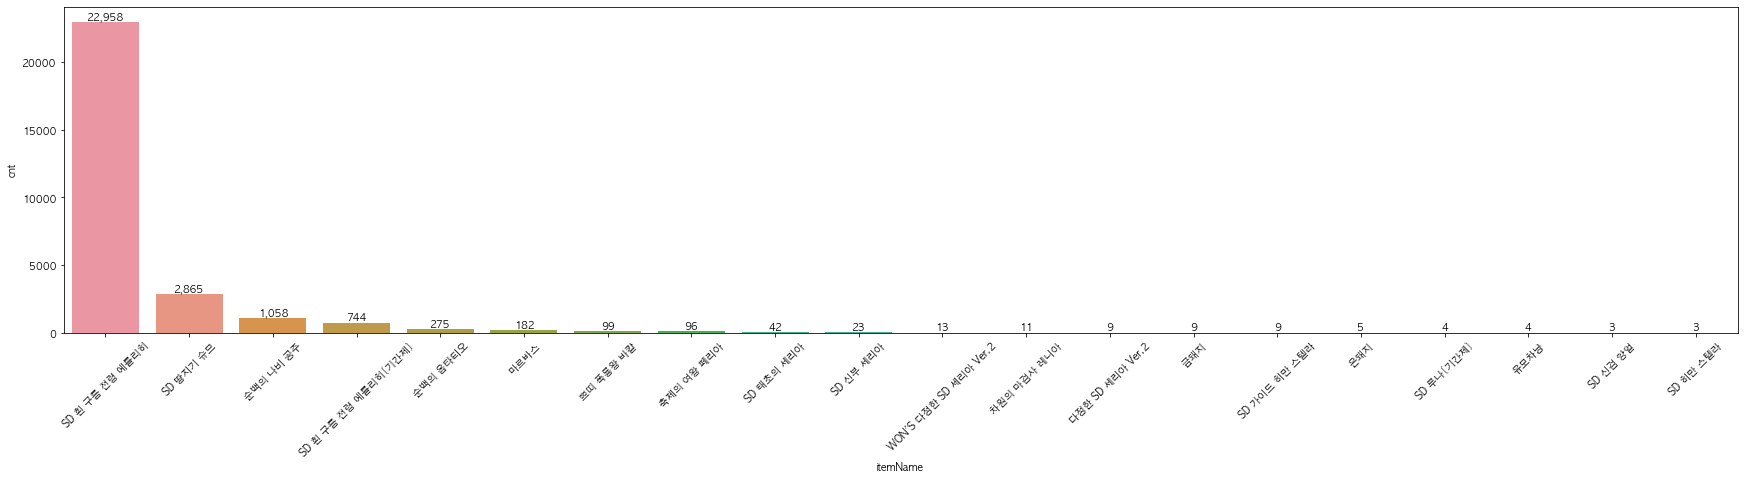

In [93]:
# 상위 30,000
rankers_ids = user_infos.sort_values('char_fame', ascending=False)[:30000]['character_ids'].values

cnt_df = pd.DataFrame(df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:20]).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(30,6))
x_label = cnt_df[:20]['itemName']
y_label = cnt_df[:20]['cnt']
sns.barplot(x = x_label, y = y_label)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')
    
plt.show()

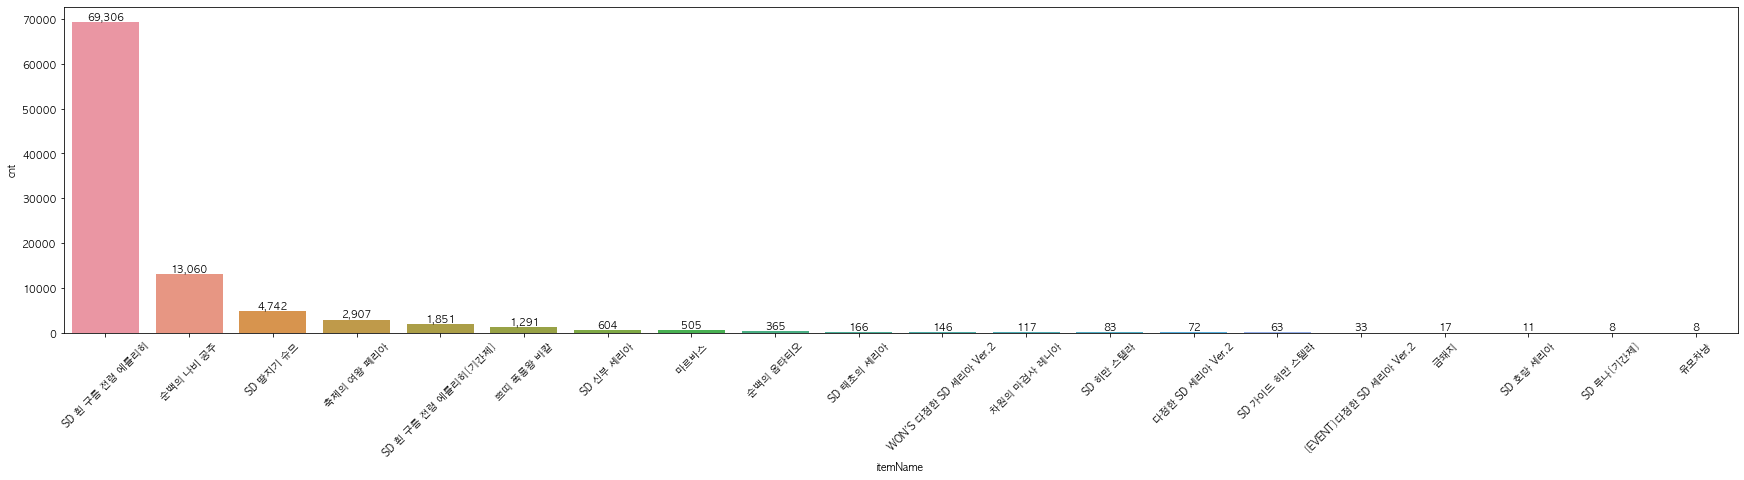

In [95]:
# 상위 100,000
rankers_ids = user_infos.sort_values('char_fame', ascending=False)[:100000]['character_ids'].values

cnt_df = pd.DataFrame(df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:20]).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(30,6))
x_label = cnt_df[:20]['itemName']
y_label = cnt_df[:20]['cnt']
sns.barplot(x = x_label, y = y_label)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')
    
plt.show()

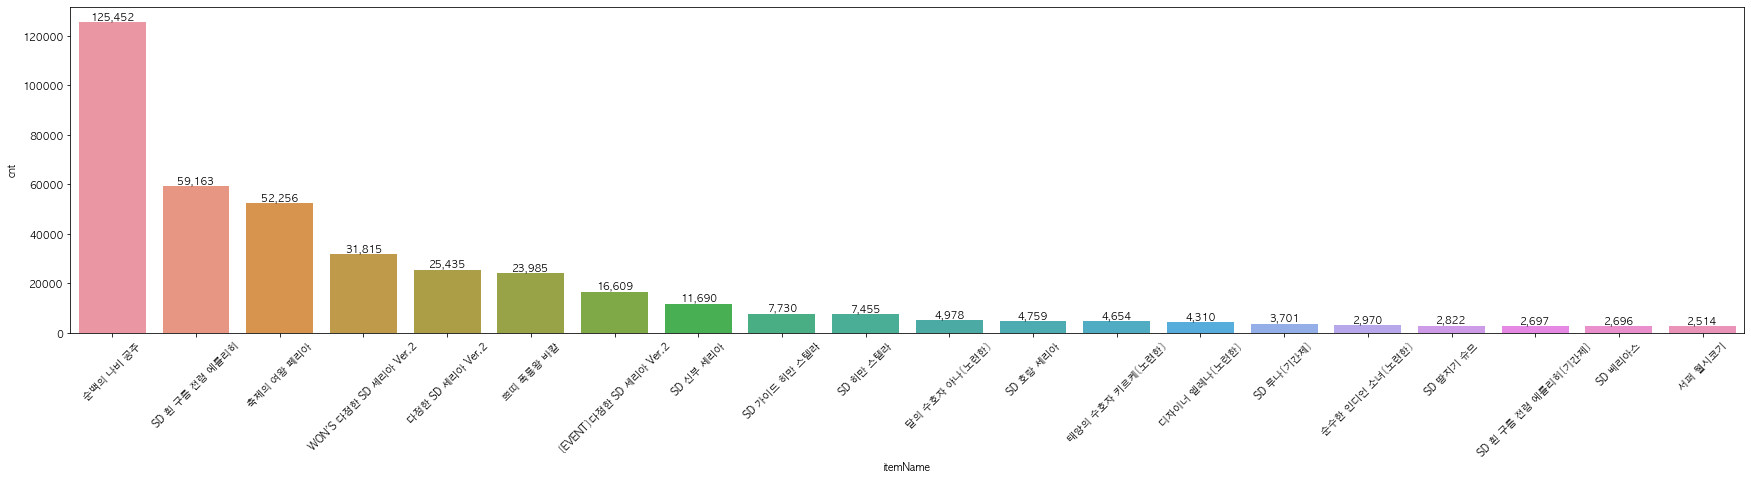

In [96]:
# 그외
rankers_ids = user_infos.sort_values('char_fame', ascending=False)[100001:]['character_ids'].values

cnt_df = pd.DataFrame(df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:20]).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(30,6))
x_label = cnt_df[:20]['itemName']
y_label = cnt_df[:20]['cnt']
sns.barplot(x = x_label, y = y_label)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')
    
plt.show()

In [20]:
tmp

,itemName,count
0,SD 흰 구름 전령 에를리히,7190
1,SD 땅지기 슈므,1469
2,SD 흰 구름 전령 에를리히[기간제],250
3,순백의 옵타티오,222
4,순백의 나비 공주,174
5,마르바스,66
6,쁘띠 폭룡왕 바칼,17
7,축제의 여왕 페리아,12
8,SD 태초의 세리아,10
9,WON'S 다정한 SD 세리아 Ver.2,8


In [22]:
from collections import defaultdict
ratios = defaultdict(list)

for slice_point in range(10000,500001,50000):
    rankers_ids = user_infos.sort_values('char_fame', ascending=False)[:slice_point]['character_ids'].values
    tmp = df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:20].reset_index()[:20] 
    tmp['ratio'] = round(tmp['count']/(tmp['count'].sum()), 4)

    for idx, row in tmp.iterrows():
        ratios[row['itemName']].append(row['ratio'])

rankers_ids = user_infos.sort_values('char_fame', ascending=False)['character_ids'].values
tmp = df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:20].reset_index()[:20]
tmp['ratio'] = round(tmp['count']/(tmp['count'].sum()), 4)

for idx, row in tmp.iterrows():
        ratios[row['itemName']].append(row['ratio'])

In [23]:
ratios.keys()

dict_keys(['SD 흰 구름 전령 에를리히', 'SD 땅지기 슈므', 'SD 흰 구름 전령 에를리히[기간제]', '순백의 옵타티오', '순백의 나비 공주', '마르바스', '쁘띠 폭룡왕 바칼', '축제의 여왕 페리아', 'SD 태초의 세리아', "WON'S 다정한 SD 세리아 Ver.2", 'SD 신부 세리아', 'SD 가이드 히만 스텔라', 'SD 루나[기간제]', '은돼지', '금돼지', '다정한 SD 세리아 Ver.2', '개구쟁이 세리아', '프로 서퍼 줄리아', '말썽꾸러기 세리아', 'SD 타나토스[노련한]', '차원의 마검사 레니아', 'SD 히만 스텔라', '[EVENT]다정한 SD 세리아 Ver.2', 'RB Ver.P', '유모차냥', 'SD 호랑 세리아', '태양의 수호자 키르케[노련한]', '디자이너 엘레나[노련한]', '달의 수호자 야나[노련한]', '순수한 인디언 소녀[노련한]', 'SD 베리아스', '서퍼 웰시코기'])

In [173]:
rankers_ids = user_infos.sort_values('char_fame', ascending=False)[:10000]['character_ids'].values
df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:10]

SD 흰 구름 전령 에를리히           7190
SD 땅지기 슈므                 1469
SD 흰 구름 전령 에를리히[기간제]       250
순백의 옵타티오                   222
순백의 나비 공주                  174
마르바스                        66
쁘띠 폭룡왕 바칼                   17
축제의 여왕 페리아                  12
SD 태초의 세리아                  10
WON'S 다정한 SD 세리아 Ver.2       8
Name: itemName, dtype: int64

In [25]:
gasungbi = creature_info[creature_info['모험가 명성'] == 810]['itemName'].values
gasungbi

array(['SD 가이드 히만 스텔라', "WON'S 다정한 SD 세리아 Ver.2", '다정한 SD 세리아 Ver.2',
       '[EVENT]다정한 SD 세리아 Ver.2', 'SD 계곡의 파수꾼 루갈루', 'SD 큰 어른 루톤',
       'SD 루나[기간제]', 'SD 계곡 감시자 렐'], dtype=object)

In [10]:
gasungbi = creature_info[creature_info['모험가 명성'] == 810]['itemName'].values
gasungbi_array = np.array([float(0) for _ in range(11)])
for col in gasungbi:
    if len(ratios[col]) != 11 : continue
    gasungbi_array += np.array(ratios[col])

NameError: name 'ratios' is not defined

In [200]:
plot_data = {
    '신규 종결 크리쳐' : np.array(ratios['SD 흰 구름 전령 에를리히']) + np.array(ratios['SD 땅지기 슈므']),
    '이전 종결 크리쳐' : np.array(ratios['순백의 나비 공주']) + np.array(ratios['축제의 여왕 페리아']) + np.array(ratios['쁘띠 폭룡왕 바칼']),
    '신규 종결 크리쳐[기간제]' : np.array(ratios['SD 흰 구름 전령 에를리히[기간제]']),
    '가성비 크리쳐' : gasungbi_array
}

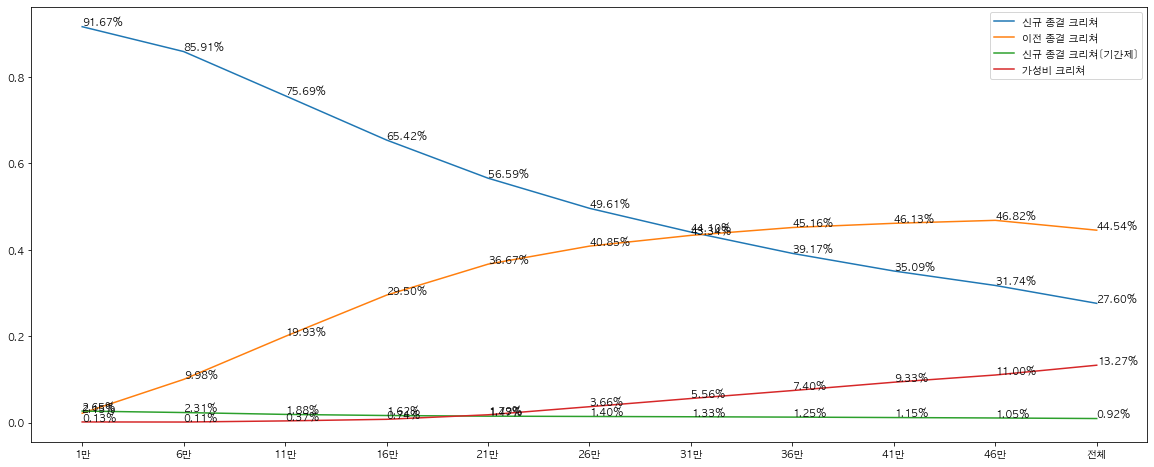

In [202]:
plt.figure(figsize=(20,8))

x = [f'{i}만' for i in range(1,51, 5)] + ['전체']

for (key, values) in (plot_data.items()):
    sns.lineplot(x = x, y=values, label = key)
    for idx, value in enumerate(values):
        plt.text(idx, value, f'{value:.2%}')

plt.show()

In [217]:
len(df) * 44.54

25303753.02

#크리쳐 스킨

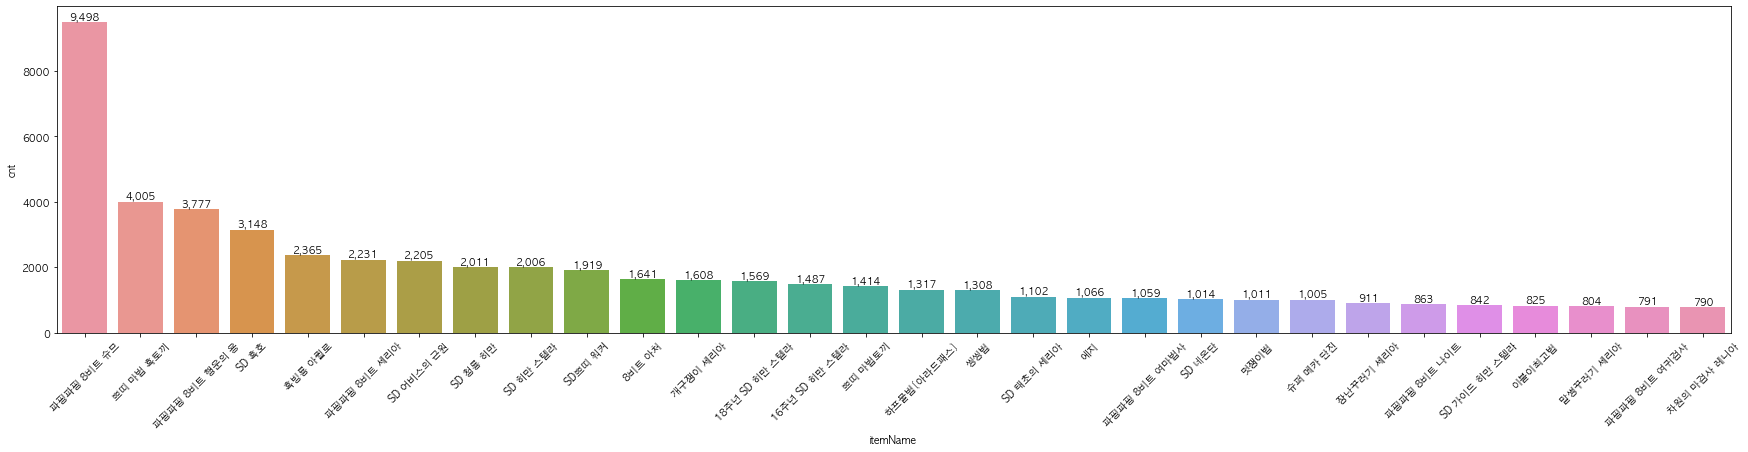

총 캐릭터 수 : 568,113
스킨 크리처 장착 수 : 113,292
크리처 종류 : 806
상위 30개 항목 : 55,592 (0.4900000000000001)


,itemName,cnt,ratio
0,파핑파핑 8비트 슈므,9498,0.084
1,쁘띠 마법 흑토끼,4005,0.035
2,파핑파핑 8비트 행운의 용,3777,0.033
3,SD 흑호,3148,0.028
4,흑빙룡 아퀼로,2365,0.021
5,파핑파핑 8비트 세리아,2231,0.020
6,SD 어비스의 근원,2205,0.019
7,SD 청룡 히만,2011,0.018
8,SD 히만 스텔라,2006,0.018
9,SD쁘띠 워커,1919,0.017


In [216]:
cnt_df = pd.DataFrame(clone_creature['clone_itemName'].value_counts()).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(30,6))
x_label = cnt_df[:30]['itemName']
y_label = cnt_df[:30]['cnt']
sns.barplot(x = x_label, y = y_label)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')
    
plt.show()

cnt_df['ratio'] = round(cnt_df['cnt']/cnt_df['cnt'].sum(),3)
print(f'총 캐릭터 수 : {len(df):,}')
print(f"스킨 크리처 장착 수 : {len(df[~df['clone_itemName'].isna()]):,}")
print(f'크리처 종류 : {len(cnt_df):,}')
print(f"상위 30개 항목 : {cnt_df[:30]['cnt'].sum():,} ({cnt_df[:30]['ratio'].sum()})")
cnt_df[:30]

In [40]:
def get_item_detail_info(itemId):
    url = f'https://api.neople.co.kr/df/items/{itemId}?apikey={api_key}'
    
    res = requests.get(url)
    
    if res.status_code == 200:
        return res
    
    return 
res = get_item_detail_info(df.iloc[0]['itemId'])

In [ ]:
res.json()

In [215]:
clone_creature[clone_creature['clone_itemName'] == '흑빙룡 아퀼로']

,serverId,characterId,clone_itemId,clone_itemName
5,cain,04949ee31cb654d16653bfe30ec3d602,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
12,cain,dd90f896f4a0f8c7250fddb7d01eaedd,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
29,cain,17ced38e2e6a6000e4024337d26e00e2,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
66,cain,f815418402685189eb011a66b15aab0a,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
129,casillas,455bf9bf5a3cd2d9b7272b31bce82d30,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
...,...,...,...,...
607055,casillas,d21055f9e2e2eccdd82a0e5fdf23b2d0,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
607122,cain,5fe0a1ce8b181f80b6db4abd369393c4,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
607161,diregie,3b211c242b01704ab73913127303721a,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
607327,cain,73e55d24cf8834443fd99bd1144a7564,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로


In [218]:
len(df[~df['clone_itemName'].isna()])/len(df)

0.1994180735170644

## 주요 크리쳐 거래 현황

In [430]:
new_creature_sume = pd.read_csv('./data/creature/trade/슈므_trade.csv')
new_creature_eli = pd.read_csv('./data/creature/trade/에를리히_trade.csv')
old_creature_feria = pd.read_csv('./data/creature/trade/페리아_trade.csv')
seria = pd.read_csv('./data/creature/trade/다정한 세리아 알_trade.csv')

In [431]:
def make_plot_data(data):
    data['soldDate'] = pd.to_datetime(data['soldDate'])
    price = data.set_index('soldDate').resample('6H')['unitPrice'].mean().reset_index()
    cnt = data.set_index('soldDate').resample('6H')['count'].count().reset_index()
    price['unitPrice'] = price['unitPrice'].astype('float32')
    return pd.merge(price, cnt, on='soldDate', how='inner')


In [432]:
# new_creature_eli['soldDate'] = pd.to_datetime(new_creature_eli['soldDate'])

eli_df = make_plot_data(new_creature_eli)
sume_df = make_plot_data(new_creature_sume)
old_creature_feria_df = make_plot_data(old_creature_feria)
seria_df = make_plot_data(seria)

In [433]:
def draw_sold_price_quantity(df):
    def format_with_commas(value, _):
        return "{:,.0f}".format(value)
    
    x_values = df['soldDate'].dt.strftime('%m-%d %H:%M')
    
    x = [i for i in range(len(x_values))]

    fig, ax1 = plt.subplots(figsize=(20,6))
    sns.barplot(data=df, x = x, y = 'count', ax = ax1, label = '판매 수량')
    ax1.set_ylabel('판매수량', color='b')
    ax1.tick_params('y', colors='b')

    # # 두 번째 Y축에 대한 플로팅
    ax2 = ax1.twinx()
    sns.lineplot(data=df, x = x, y = 'unitPrice', ax = ax2, label = '평균 판매 가격', color='r', marker='o')
    ax2.set_ylabel('평균 판매 가격', color='r')
    ax2.tick_params('y', colors='r')
    ax2.yaxis.set_major_formatter(FuncFormatter(format_with_commas))

    # # 범례 추가
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend().set_visible(False)  # 범례 숨기기
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    
    ax1.set_xticks(x, labels=x_values)

    plt.xticks(rotation=45)
    # 그래프 제목
    plt.title('날짜별 크리쳐 판매수량과 평균 가격')
    plt.show()

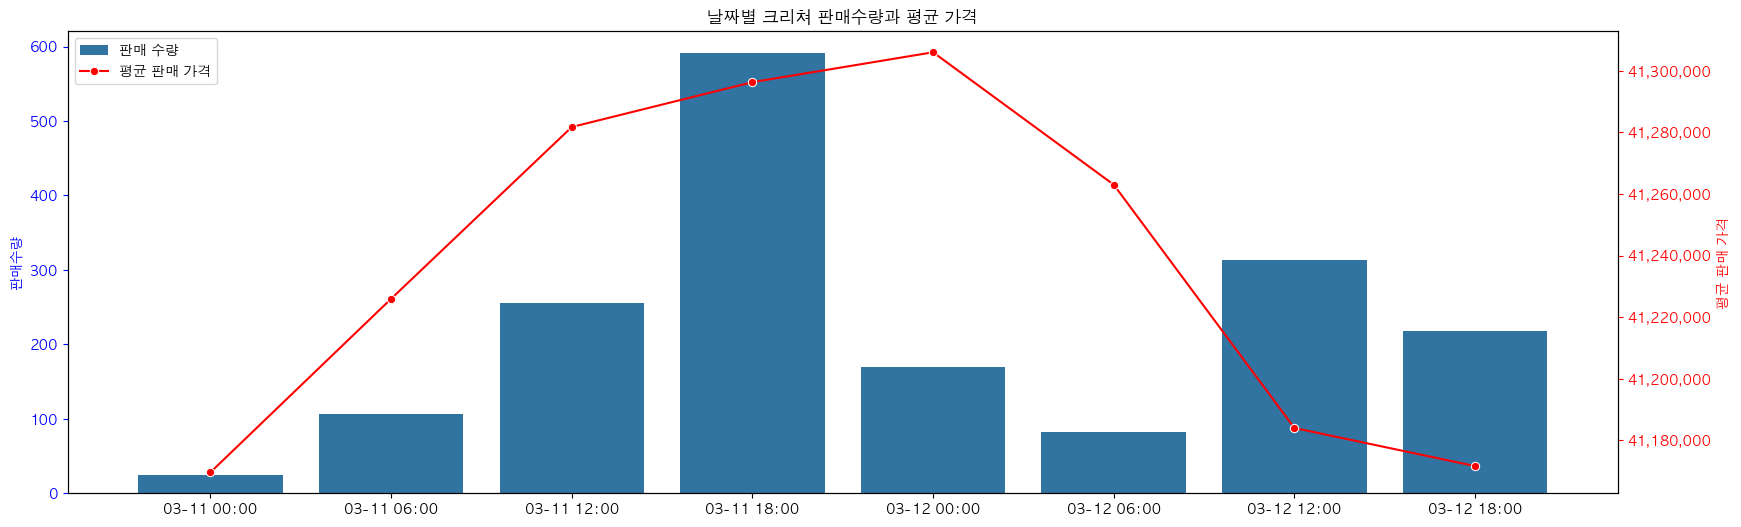

In [434]:
draw_sold_price_quantity(eli_df)

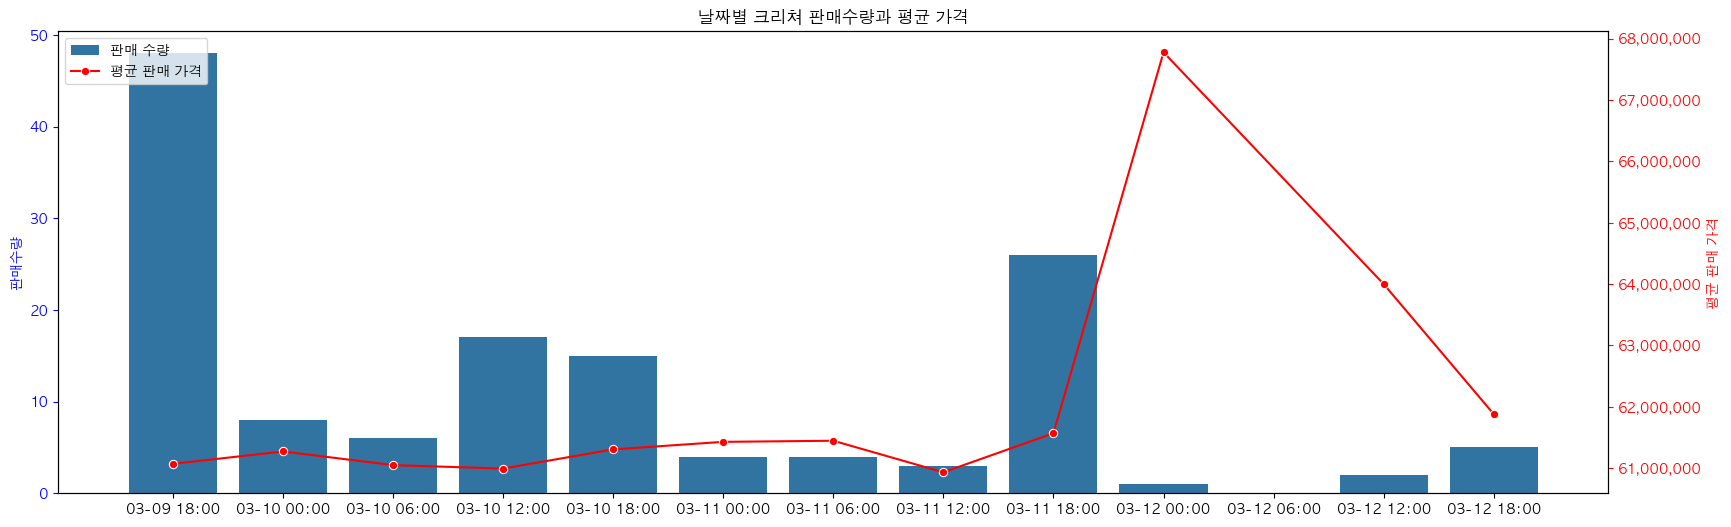

In [435]:
draw_sold_price_quantity(sume_df)


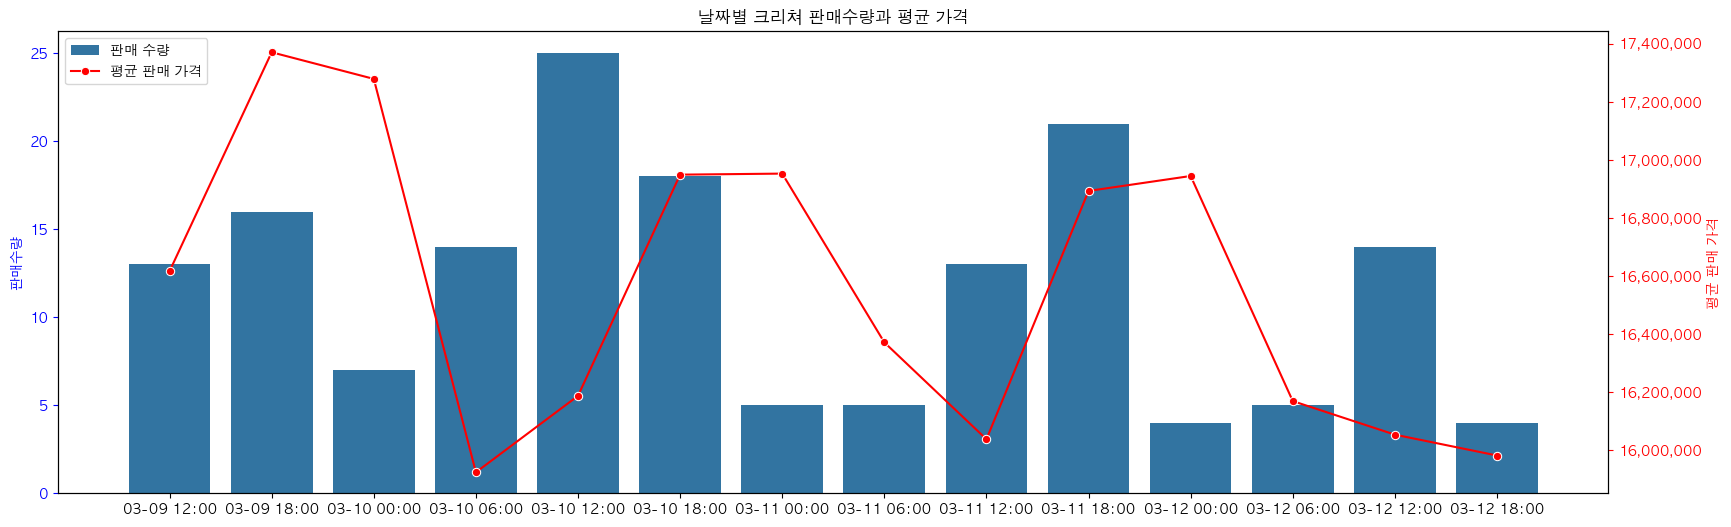

In [436]:
draw_sold_price_quantity(old_creature_feria_df)


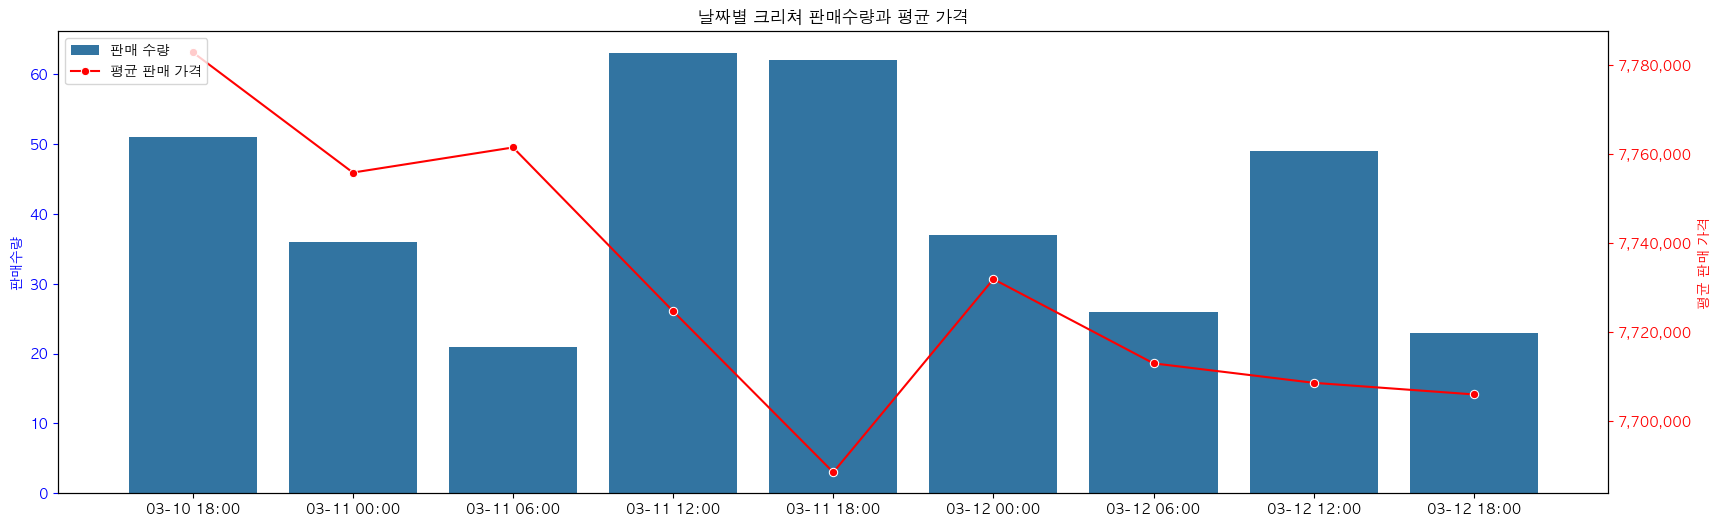

In [437]:
draw_sold_price_quantity(seria_df)


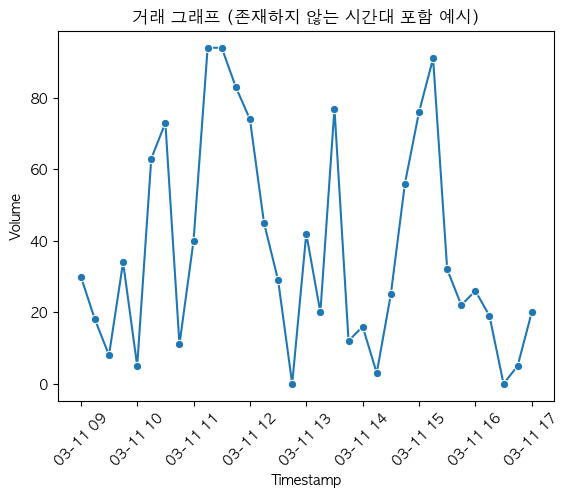

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

# 존재하지 않는 시간대를 포함한 가상의 거래 데이터 생성
def generate_sample_data(start_time, end_time, interval_minutes):
    current_time = start_time
    data = {'Timestamp': [], 'Volume': []}

    while current_time <= end_time:
        # 80% 확률로 거래가 발생하도록 설정
        if random.random() < 0.8:
            data['Timestamp'].append(current_time)
            data['Volume'].append(random.randint(1, 100))
        
        current_time += timedelta(minutes=interval_minutes)

    return pd.DataFrame(data)

# 시작 시간 및 간격 설정
start_time = datetime(2024, 3, 11, 9, 0, 0)  # 예시 시작 시간
end_time = datetime(2024, 3, 11, 17, 0, 0)    # 예시 종료 시간
interval_minutes = 15  # 15분 간격으로 데이터 생성

# 존재하지 않는 시간대를 포함한 데이터 생성
sample_data = generate_sample_data(start_time, end_time, interval_minutes)

# 시간을 기준으로 데이터 정렬
sample_data = sample_data.sort_values('Timestamp')

# 빈 시간대를 포함하여 모든 시간대 생성
all_timestamps = pd.date_range(start=start_time, end=end_time, freq=f'{interval_minutes}T')

# 빈 시간대를 추가하여 완전한 데이터셋 생성
complete_data = pd.DataFrame({'Timestamp': all_timestamps})
complete_data = pd.merge(complete_data, sample_data, on='Timestamp', how='left')
complete_data['Volume'].fillna(0, inplace=True)

# Seaborn을 사용하여 그래프 그리기
sns.lineplot(x='Timestamp', y='Volume', data=complete_data, marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.title('거래 그래프 (존재하지 않는 시간대 포함 예시)')
plt.xticks(rotation=45)
plt.show()


In [264]:
user = pd.read_csv('./data/user_infos_10000.csv')

In [265]:
user.head()

,basejob,subjob,server,char_name,char_fame,characterId,adventureName
0,거너(여),眞 런처,cain,위즈샤,60137,0cb7b947cdc7aa473149c3f12fd33421,위즈월드
1,거너(여),眞 런처,bakal,이지윤_,59229,3132c25f5767863cabb2131d44fb476d,결국내가이겼다
2,거너(여),眞 런처,bakal,민재서,59560,058d4f0cda76a18aacd280df0eb98253,어둠의초코쿠키
3,거너(여),眞 런처,cain,꿈결현상,60133,4993e4bfbf322bac7a44a86258c23d31,비주류
4,거너(여),眞 런처,siroco,향기의반짝임,58771,58b27ccfd3d5e8269d12ce71e9ee6530,Toxocara


## 모험단 정보 추가

In [267]:
user = pd.read_csv('./data/user_infos_10000.csv')
creature_info = pd.read_csv('/Users/seokholee/이모저모/dnf/data/creature/user_creature_data.csv')

user = user.rename(columns={'character_ids':'characterId'})
creature_info = pd.merge(creature_info, user, how='inner', on = 'characterId' )

In [270]:
creature_info.groupby('adventureName')

array([52480, 24725, 14352, 10236,  7844,  6289,  5136,  4145,  3601,
        3052,  2502,  2064,  1768,  1509,  1225,   948,   767,   673,
         495,   484,   338,   293,   252,   172,   137,   112,   107,
          90,    80,    55,    43,    41,    28,    24,    24,    23,
          19,    14,    13,    12,    10,     6,     5,     5,     5,
           5,     4,     3,     3,     3,     2,     2,     1,     1,
           1,     1,     1])

In [307]:
pd.DataFrame(creature_info.groupby('adventureName')['characterId'].count()).sort_values('characterId')

,characterId
adventureName,
0000000000,1
불순이,1
불속성,1
불세터,1
불삼불사,1
...,...
믿음단,55
청초한소녀들,56
감철,65


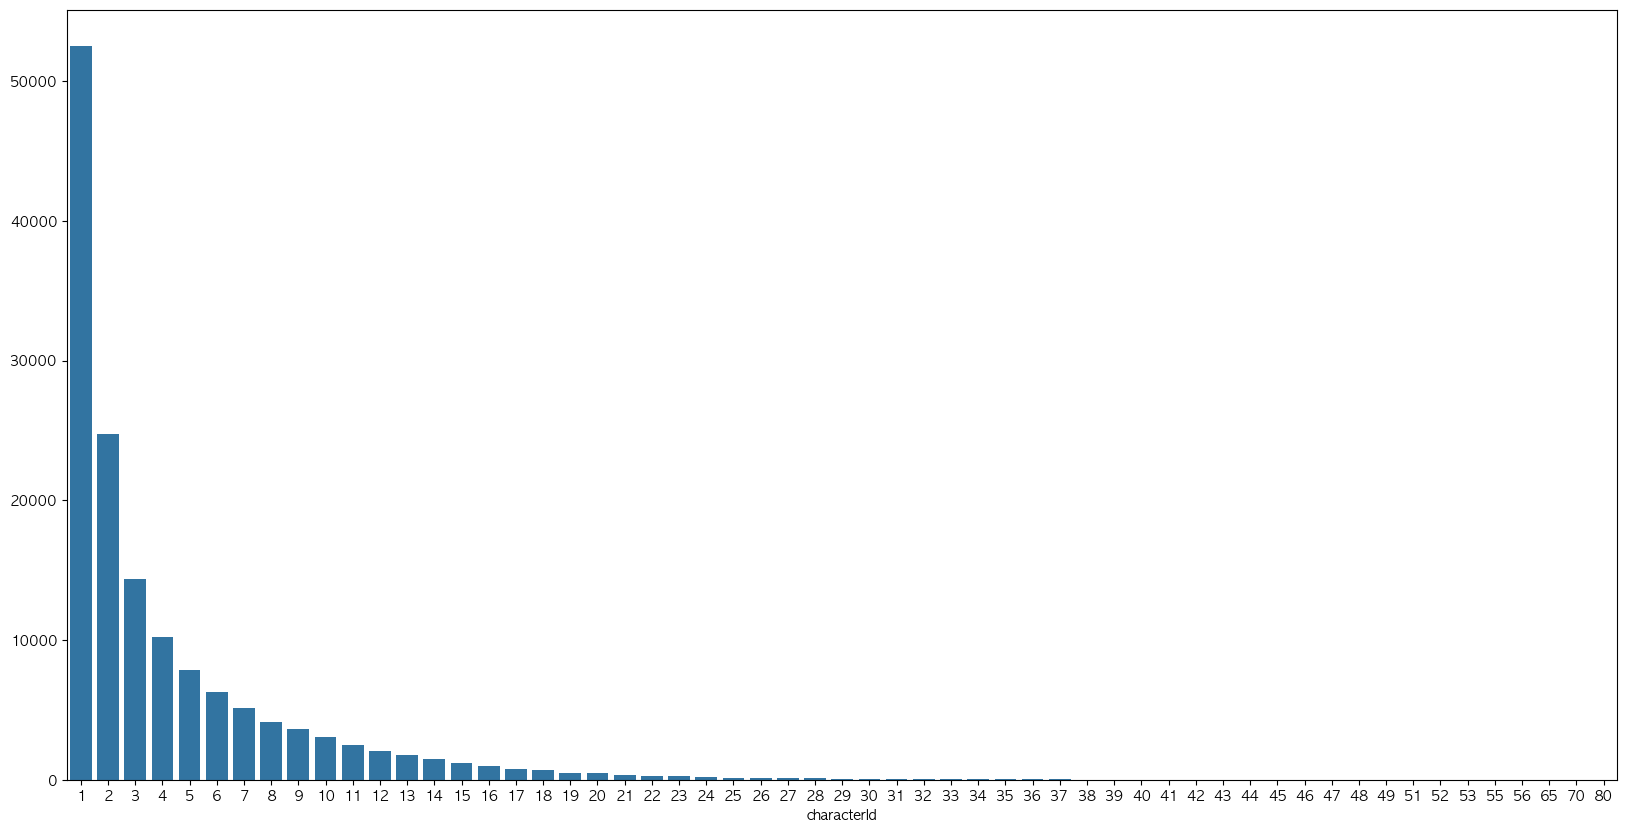

In [303]:
# 모험단 당 상위 그룹 캐릭터 분포

plt.figure(figsize=(20,10))
plt_df = creature_info.groupby('adventureName')['characterId'].count().value_counts()
sns.barplot(x = plt_df.index, y = plt_df.values)
plt.show()

In [425]:
# 상위 액티브 캐릭터에서 캐릭터가 2개 이상인 모험단중 가장 높은 명성 캐릭터 제외
adventure_df = creature_info[['adventureName','characterId','itemName','char_fame']]
adventure_multi_group_exclue_df = adventure_df.groupby('adventureName').apply(lambda x: x[x['char_fame'] < x['char_fame'].max()])


In [426]:
# 상위 액티브 캐릭터에서 캐릭터가 1개인 모험단
filter_df = adventure_df['adventureName'].value_counts().reset_index()
filter = filter_df[filter_df['count'] == 1]['adventureName'].values
multi_advens = adventure_multi_group_df['adventureName'].unique()


adventure_single_group_df = adventure_df[adventure_df['adventureName'].isin(filter)]
adventure_multi_group_df = adventure_df[adventure_df['adventureName'].isin(multi_advens)]

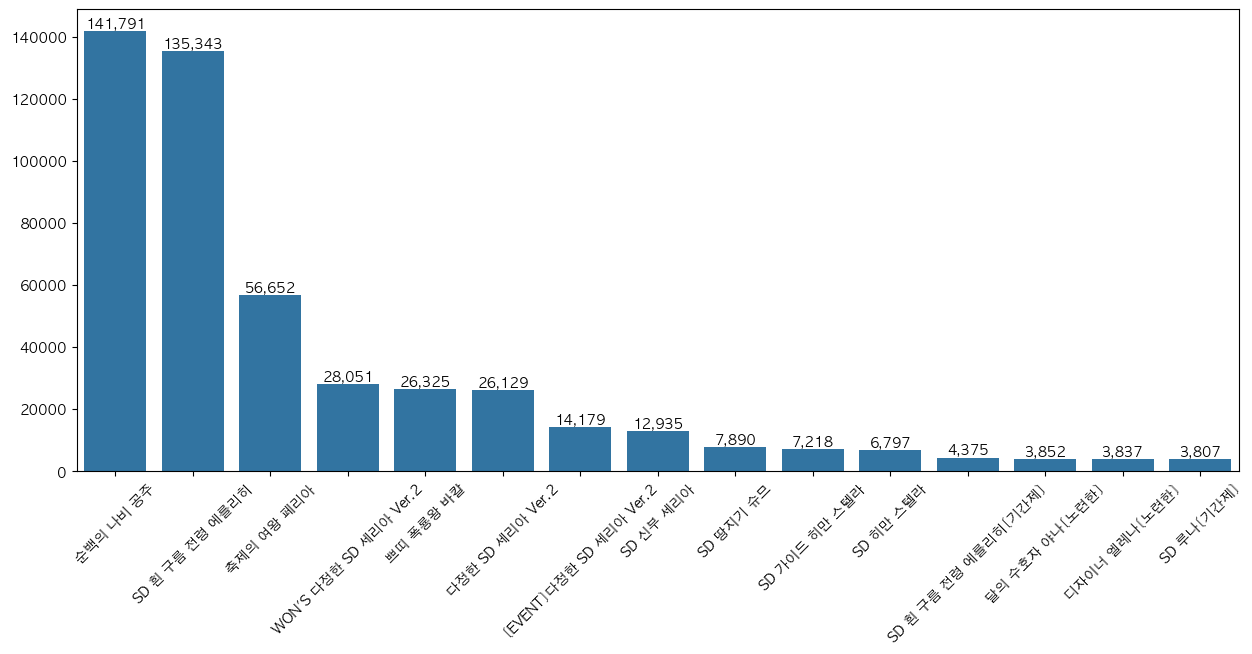

In [427]:
cnt_df = pd.DataFrame(adventure_multi_group_df['itemName'].value_counts()).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(15,6))
x_label = cnt_df[:15]['itemName']
y_label = cnt_df[:15]['cnt']
sns.barplot(x = x_label, y = y_label)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('')

plt.show()

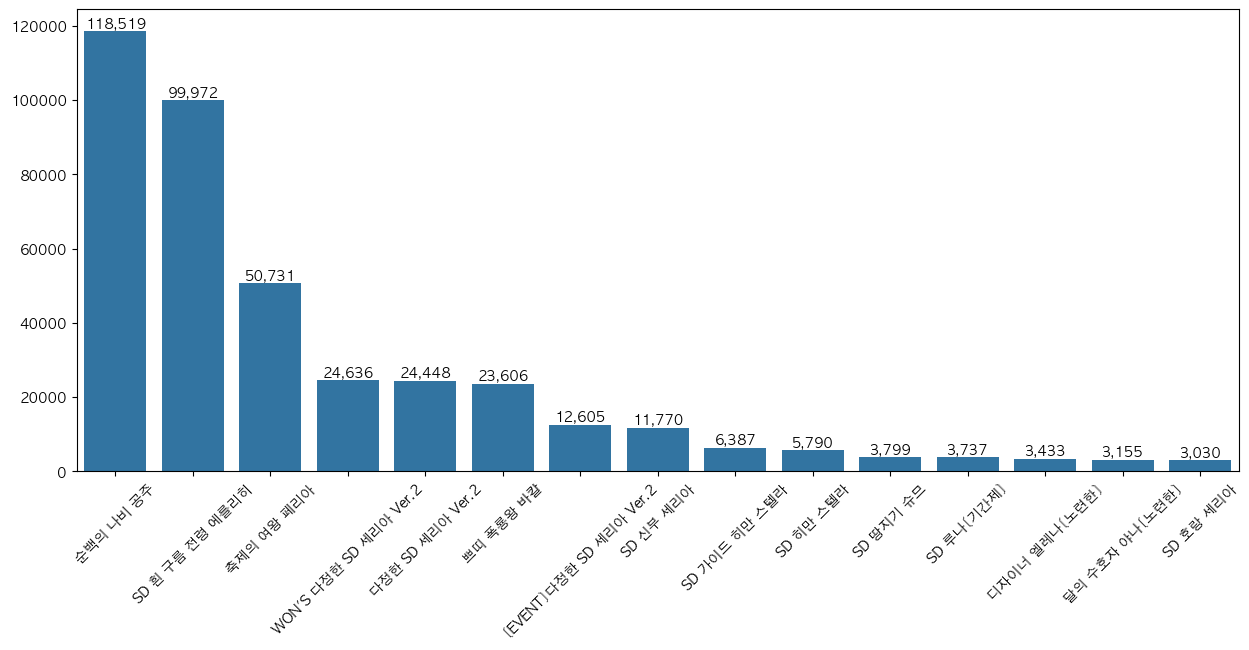

In [428]:
cnt_df = pd.DataFrame(adventure_multi_group_exclue_df['itemName'].value_counts()).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(15,6))
x_label = cnt_df[:15]['itemName']
y_label = cnt_df[:15]['cnt']
sns.barplot(x = x_label, y = y_label)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('')

plt.show()

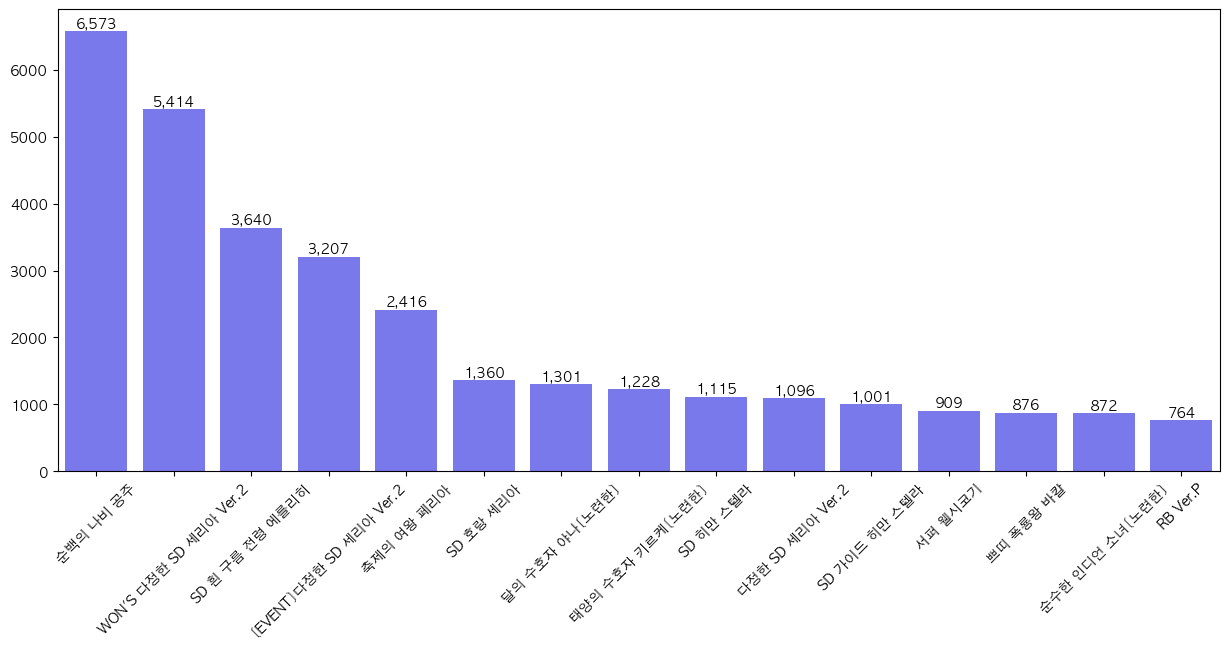

In [533]:
cnt_df = pd.DataFrame(adventure_single_group_df['itemName'].value_counts()).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(15,6))
x_label = cnt_df[:15]['itemName']
y_label = cnt_df[:15]['cnt']
sns.barplot(x = x_label, y = y_label, color='blue', alpha = 0.6)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('')

plt.show()

In [539]:
filter_data = cnt_df[cnt_df['itemName'].isin(["WON'S 다정한 SD 세리아 Ver.2", '[EVENT]다정한 SD 세리아 Ver.2]', "다정한 SD 세리아 Ver.2"])]['cnt'].sum()
filter_data, filter_data/ len(cnt_df)

(6510, 10.568181818181818)

In [538]:
cnt_df[:15]

,itemName,cnt
0,순백의 나비 공주,6573
1,WON'S 다정한 SD 세리아 Ver.2,5414
2,SD 흰 구름 전령 에를리히,3640
3,[EVENT]다정한 SD 세리아 Ver.2,3207
4,축제의 여왕 페리아,2416
5,SD 호랑 세리아,1360
6,달의 수호자 야나[노련한],1301
7,태양의 수호자 키르케[노련한],1228
8,SD 히만 스텔라,1115
9,다정한 SD 세리아 Ver.2,1096


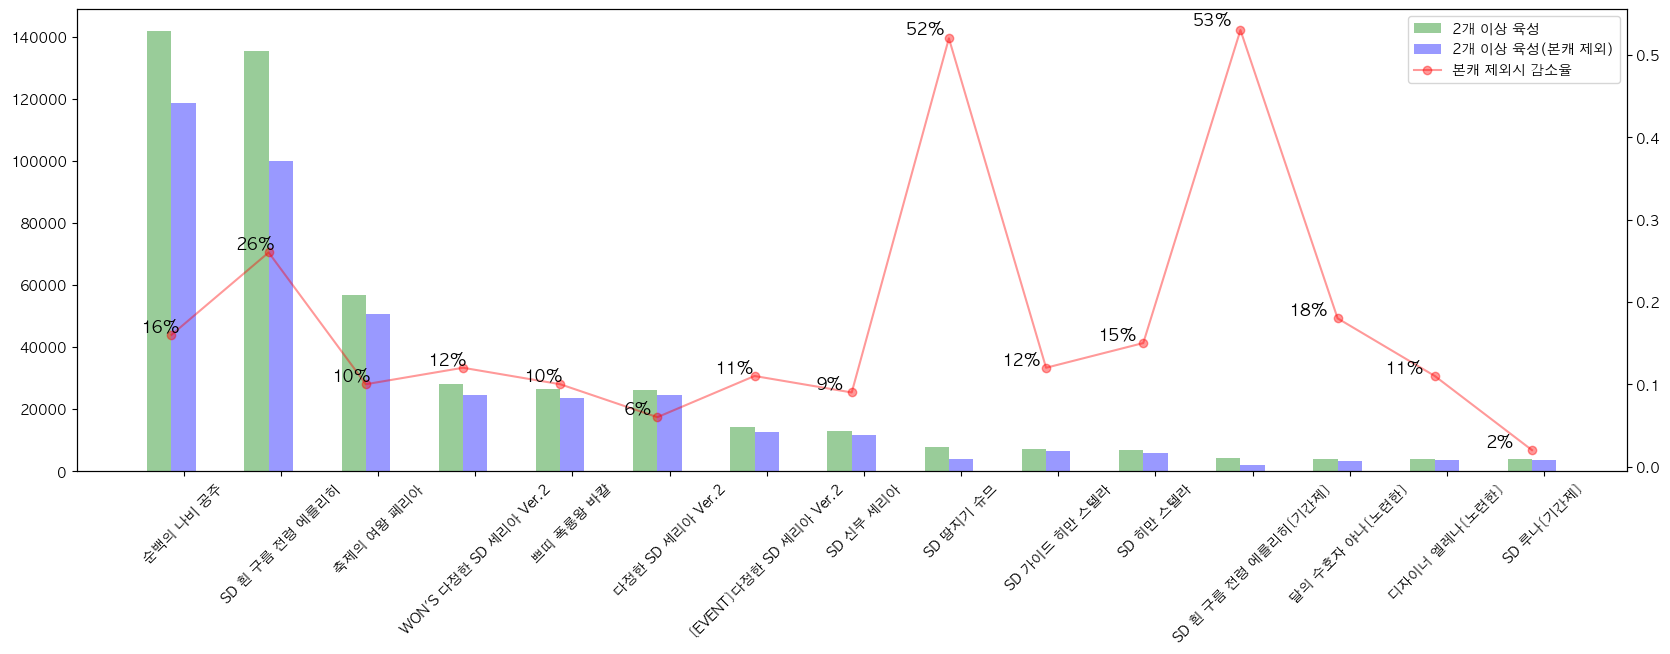

In [519]:
cnt_df = pd.DataFrame(adventure_multi_group_df['itemName'].value_counts()).reset_index()
cnt_df.columns = ['itemName','cnt']

cnt_df2 = pd.DataFrame(adventure_multi_group_exclue_df['itemName'].value_counts()).reset_index()
cnt_df2.columns = ['itemName','cnt']
tmp = cnt_df2[cnt_df2['itemName'].isin(cnt_df[:15]['itemName'].values)]
cnt_df = pd.merge(cnt_df, tmp, how = 'inner', on='itemName')

cnt_df['감소율'] = round(1 -cnt_df['cnt_y'] / cnt_df['cnt_x'], 2)

bar_width = 0.25  # 각 바의 너비

index = np.arange(15)

#plt.figure(figsize=(20,6))
fig, ax1 = plt.subplots(figsize=(20,6))

plt.bar(index , cnt_df['cnt_x'], bar_width, color = 'g', alpha=0.4, label = '2개 이상 육성')
plt.bar(index + bar_width , cnt_df['cnt_y'], bar_width, color = 'b', alpha=0.4 , label = '2개 이상 육성(본캐 제외)')

ax2 = ax1.twinx()
plt.plot(index + bar_width/2 , cnt_df['감소율'], color='r', alpha=0.4, label = '본캐 제외시 감소율', marker='o')

for idx, y in enumerate(cnt_df['감소율'].values):
    plt.text(idx*0.985, y*1.005, f'{y:.0%}', fontsize=12, color='black', ha='center', va='bottom')

ax1.set_xticks(np.arange(bar_width, 15 + bar_width, 1), cnt_df['itemName'].values, rotation=45)

plt.xlabel('')
plt.ylabel('')

# # 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend().set_visible(False)  # 범례 숨기기
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()